<a href="https://colab.research.google.com/github/kumudharam/TestProject/blob/main/ImageTemplateMatching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python
!pip install opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
pic = cv2.imread('/content/IS3Source_1.jpg')

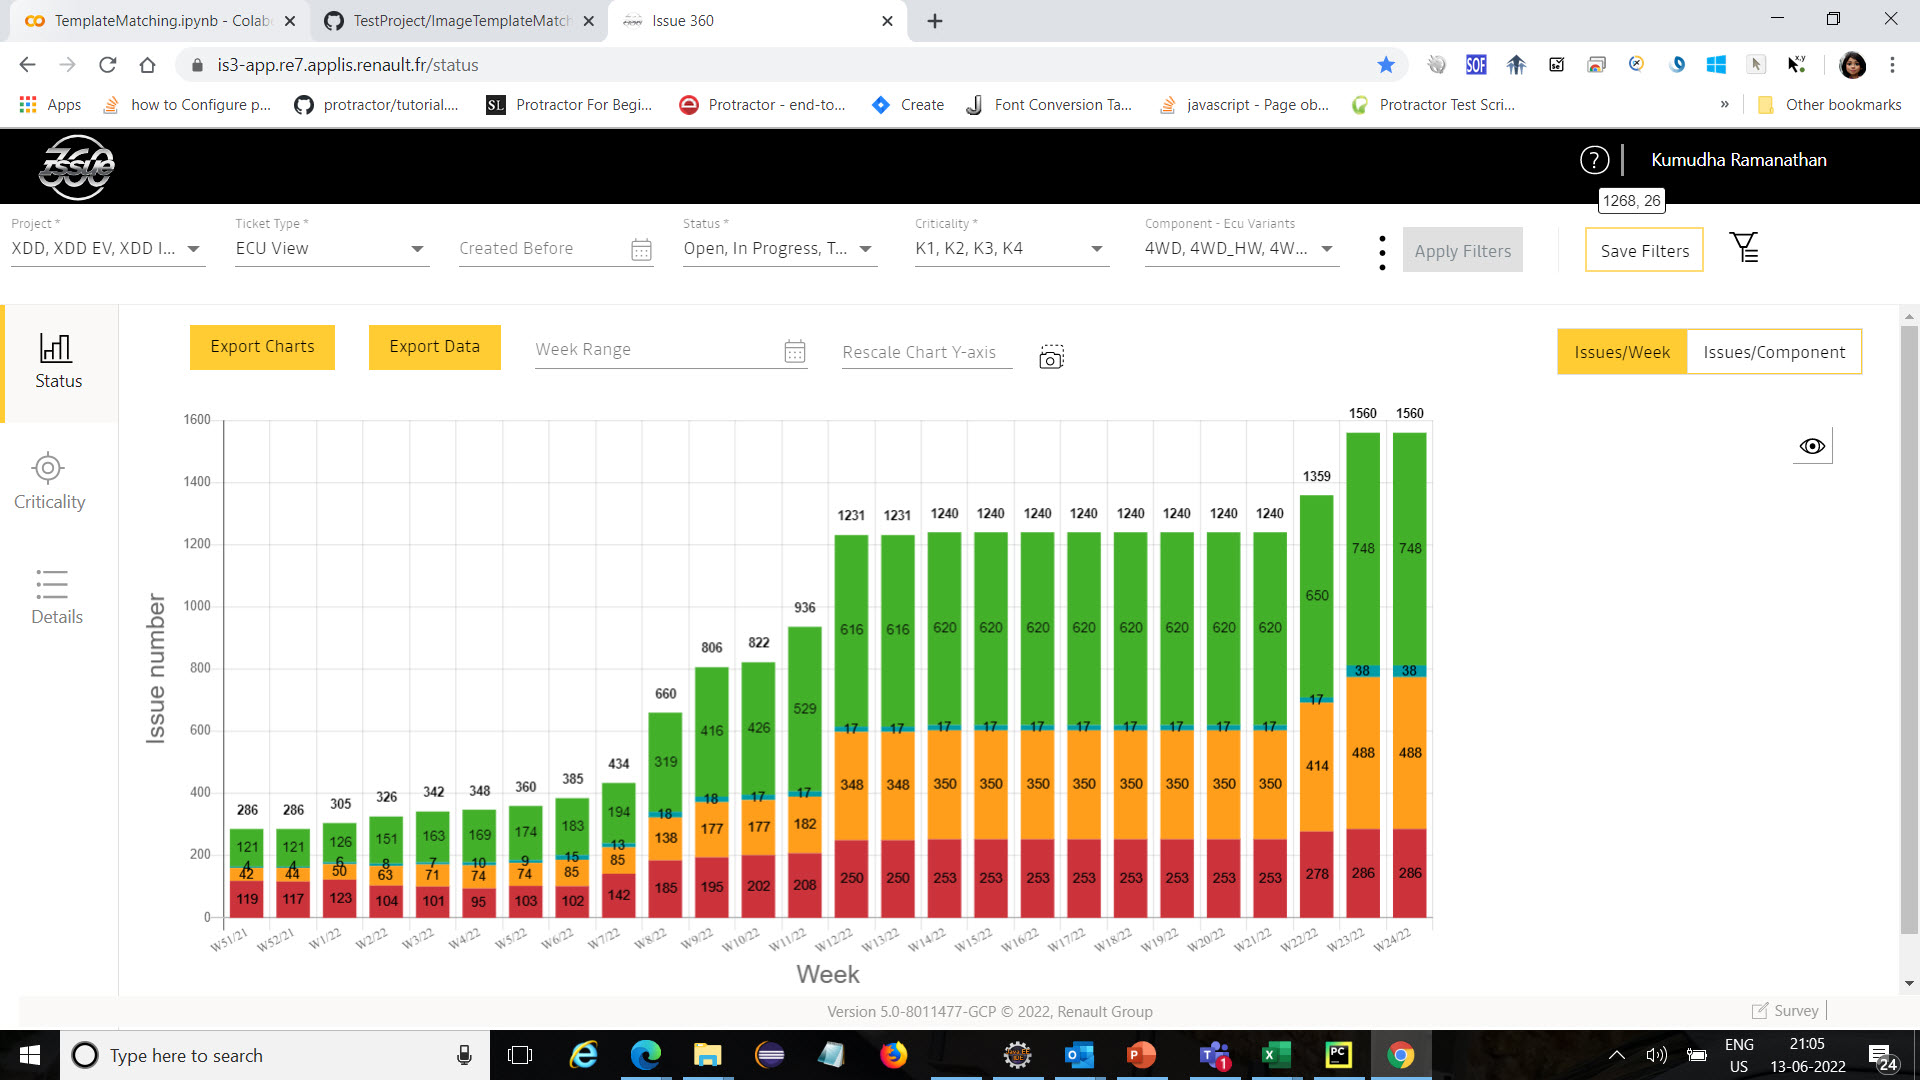

-1

In [ ]:
cv2_imshow(pic)
cv2.waitKey(0)

In [ ]:
print(pic)

[[[230 225 222]
  [230 225 222]
  [230 225 222]
  ...
  [230 225 222]
  [230 225 222]
  [230 225 222]]

 [[230 225 222]
  [230 225 222]
  [230 225 222]
  ...
  [230 225 222]
  [230 225 222]
  [230 225 222]]

 [[230 225 222]
  [230 225 222]
  [230 225 222]
  ...
  [230 225 222]
  [230 225 222]
  [230 225 222]]

 ...

 [[  9  11  11]
  [  9  11  11]
  [  9  11  11]
  ...
  [ 27  25  24]
  [ 27  25  24]
  [ 26  24  23]]

 [[  9  11  11]
  [  9  11  11]
  [  9  11  11]
  ...
  [ 26  24  23]
  [ 25  23  22]
  [ 24  22  21]]

 [[  9  11  11]
  [  9  11  11]
  [ 10  12  12]
  ...
  [ 25  23  22]
  [ 23  21  20]
  [ 22  20  19]]]


In [ ]:
pic = cv2.cvtColor(pic, cv2.COLOR_RGB2GRAY)

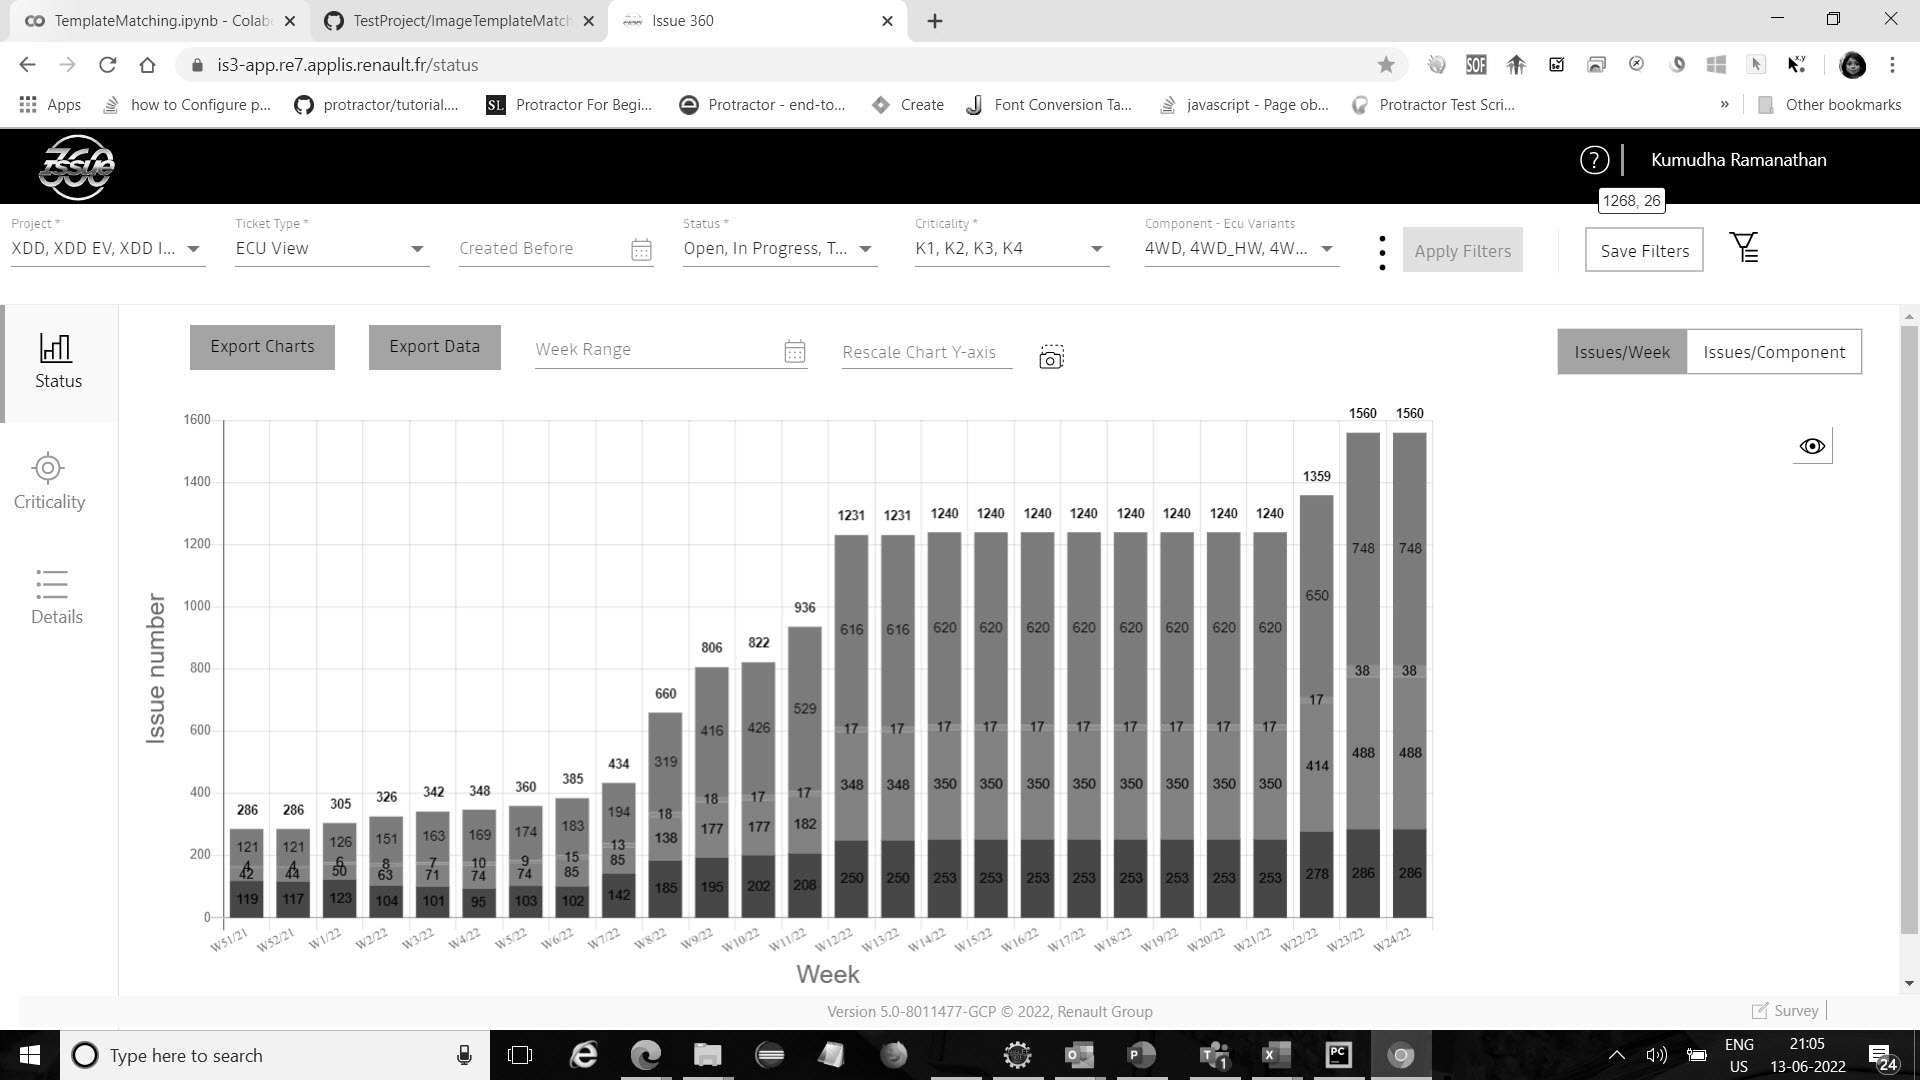

-1

In [ ]:
cv2_imshow(pic)
cv2.waitKey(0)

In [ ]:
print(pic)

[[226 226 226 ... 226 226 226]
 [226 226 226 ... 226 226 226]
 [226 226 226 ... 226 226 226]
 ...
 [ 10  10  10 ...  25  25  24]
 [ 10  10  10 ...  24  23  22]
 [ 10  10  11 ...  23  21  20]]


In [ ]:
cv2.imwrite("graypic.jpg", pic)

True

In [ ]:
import numpy as np
import cv2 

In [ ]:
src = cv2.imread("/content/IS3Source_1.jpg")
Temp = cv2.imread("/content/IS3_ExportChart.jpg")

In [ ]:
src = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
temp = cv2.cvtColor(Temp, cv2.COLOR_RGB2GRAY)

In [ ]:
height, width =src.shape
height, width

(1080, 1920)

In [ ]:
H, W = temp.shape
H, W

(44, 148)

In [ ]:
methods = [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR,
             cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]

(1139, 187) (467, 1013)


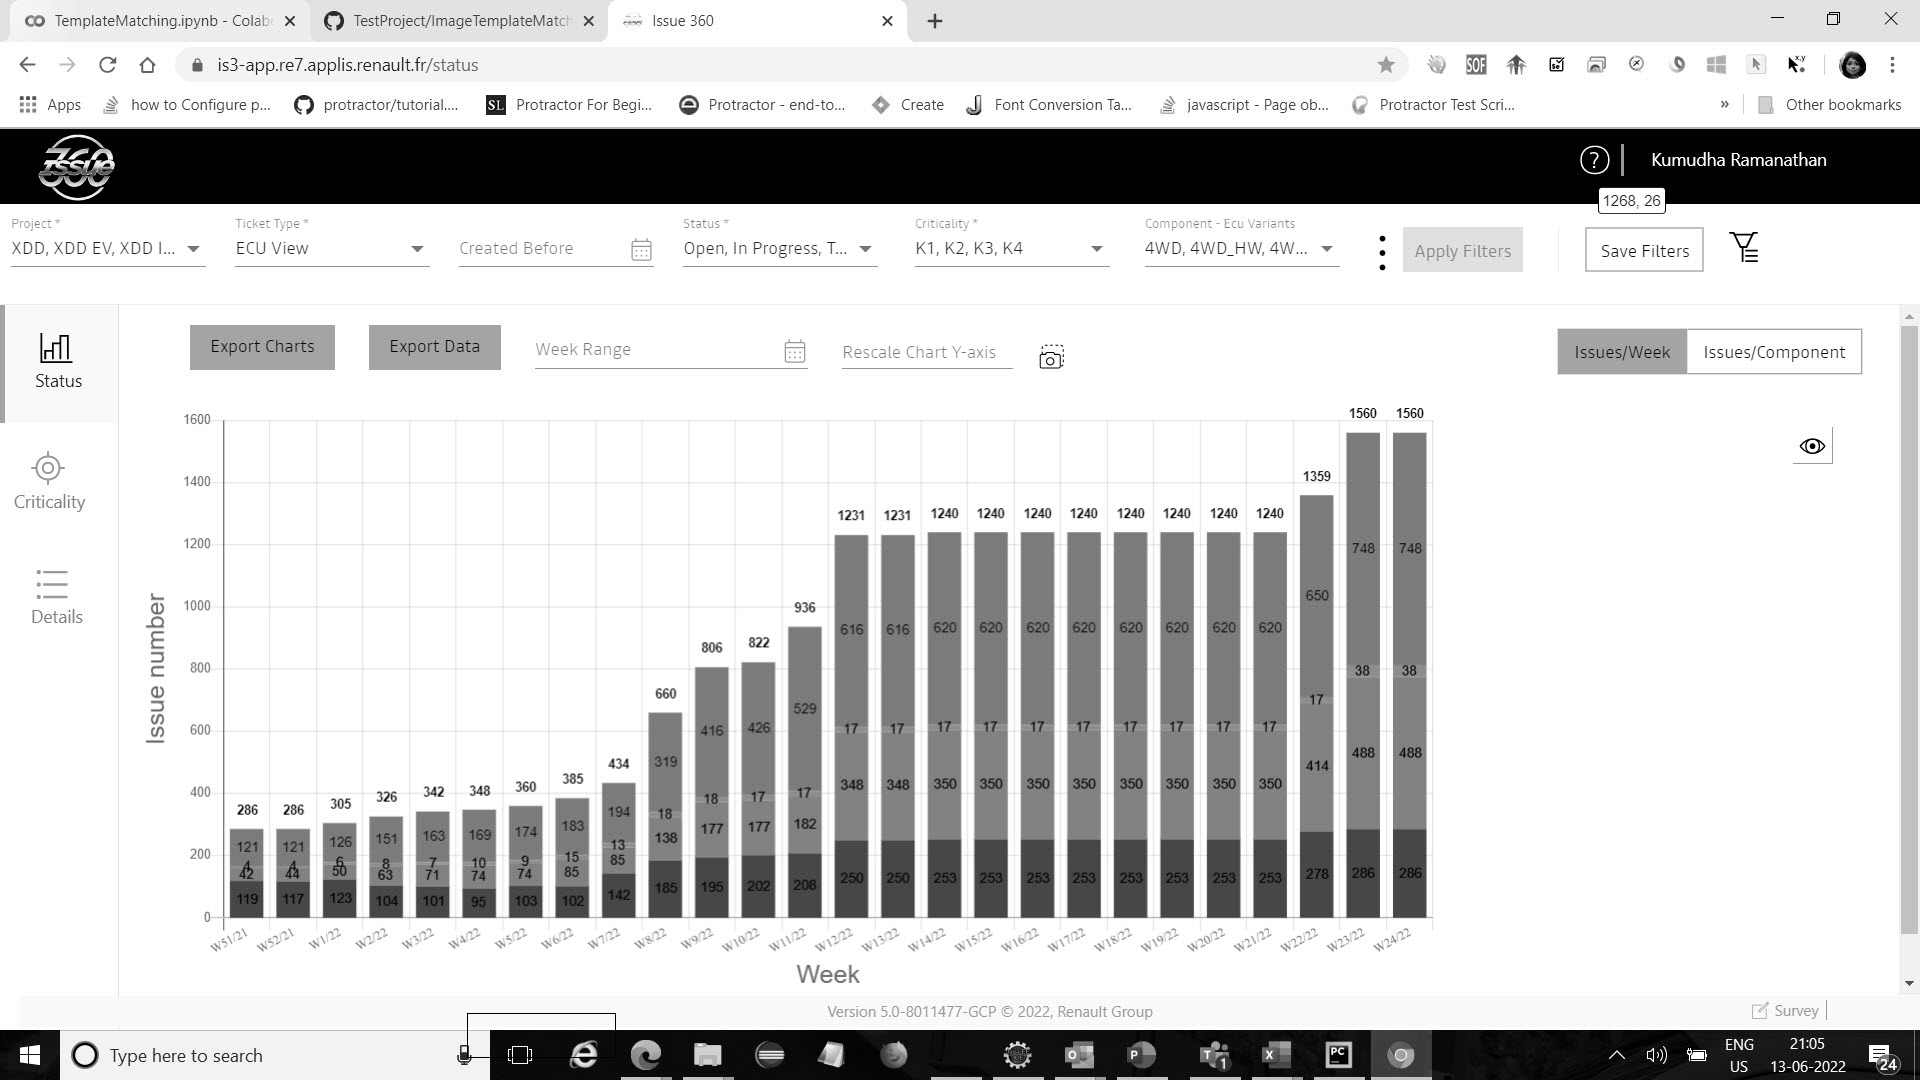

(1712, 137) (189, 323)


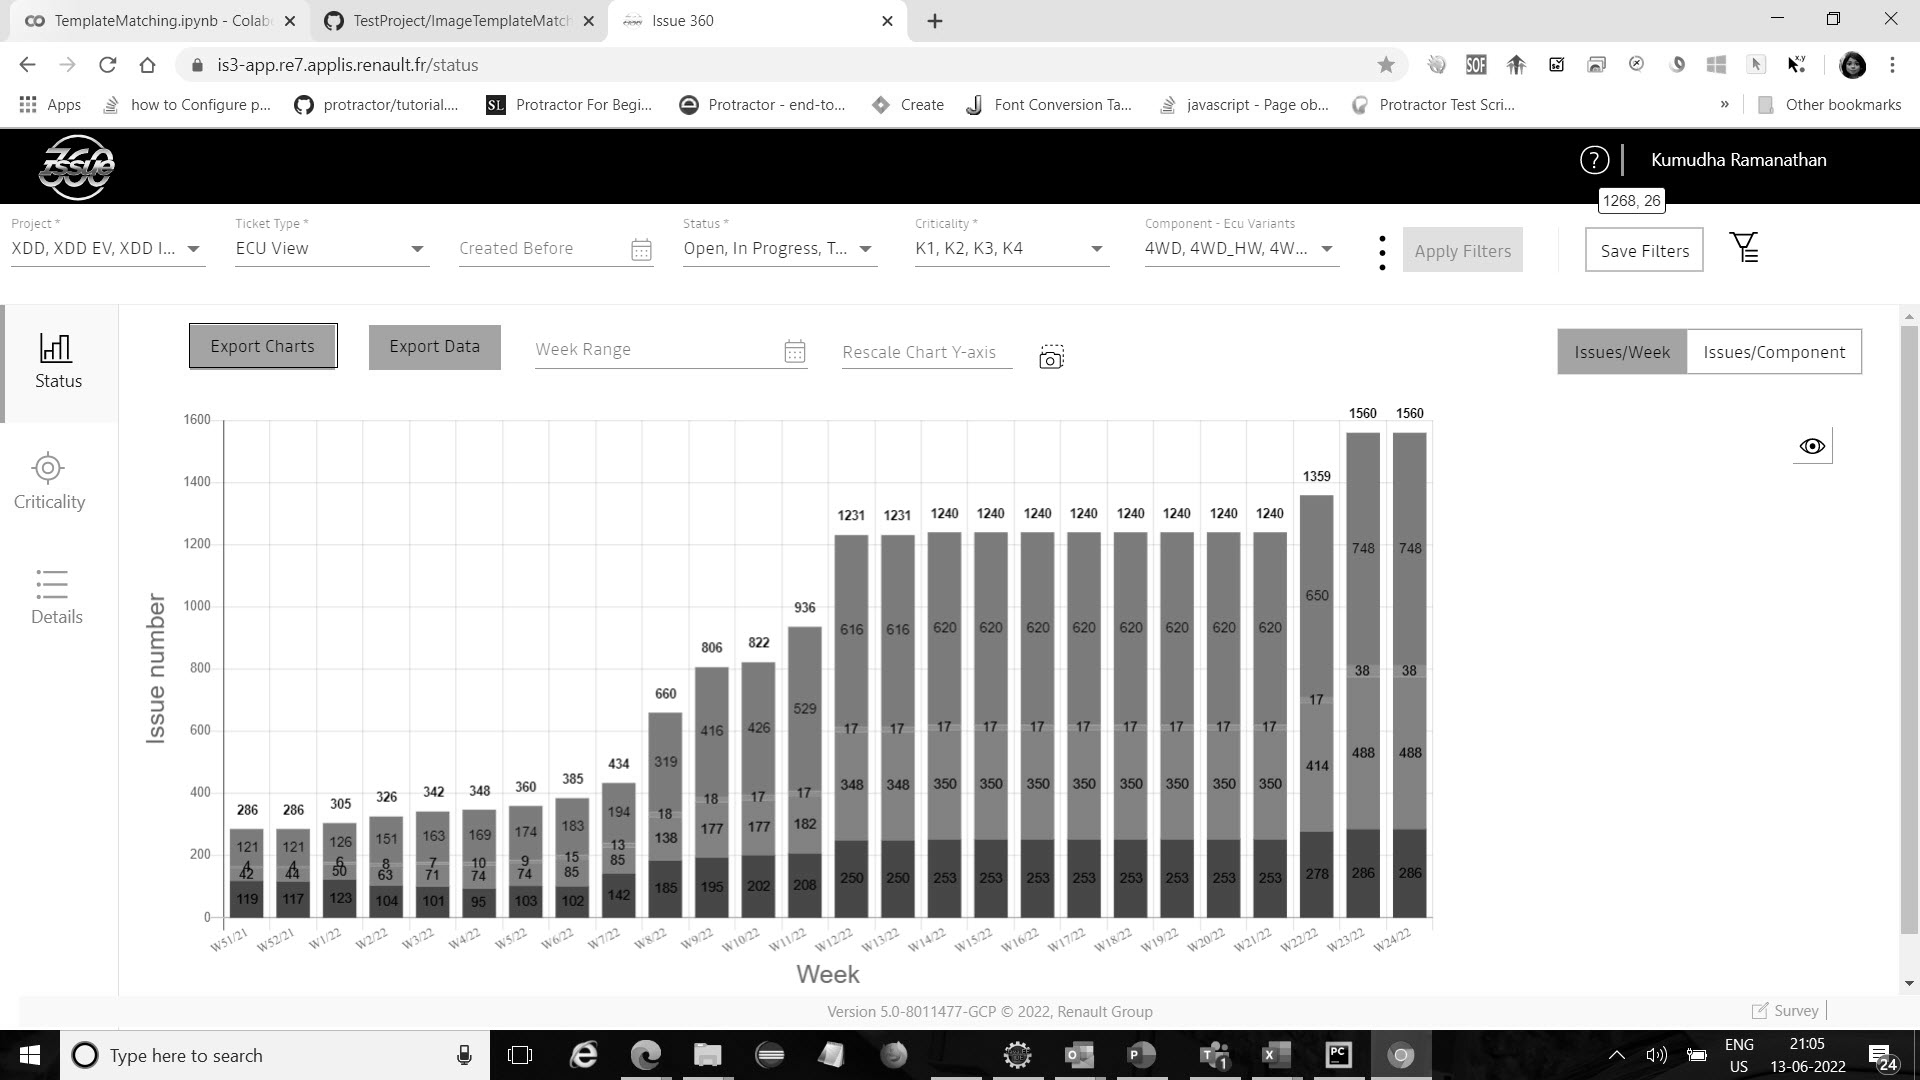

(1339, 153) (1258, 312)


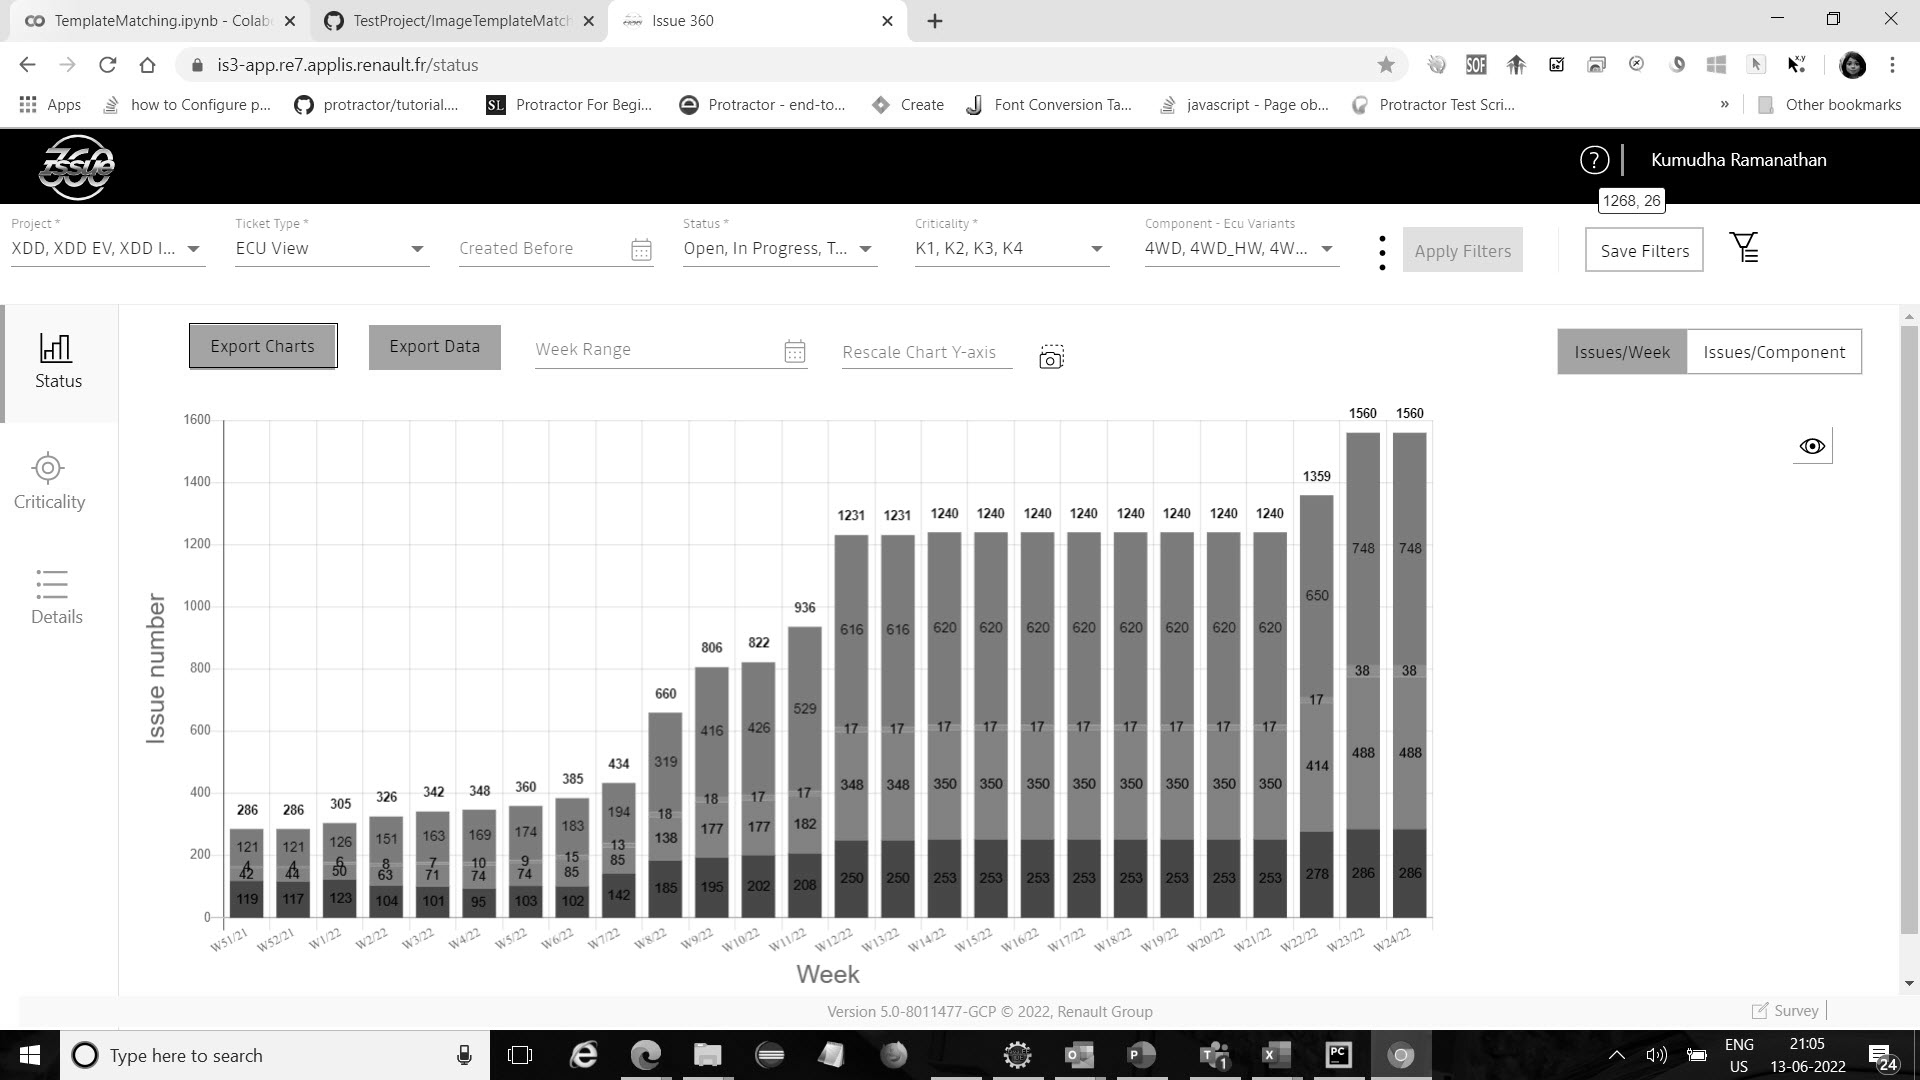

(120, 134) (1386, 228)


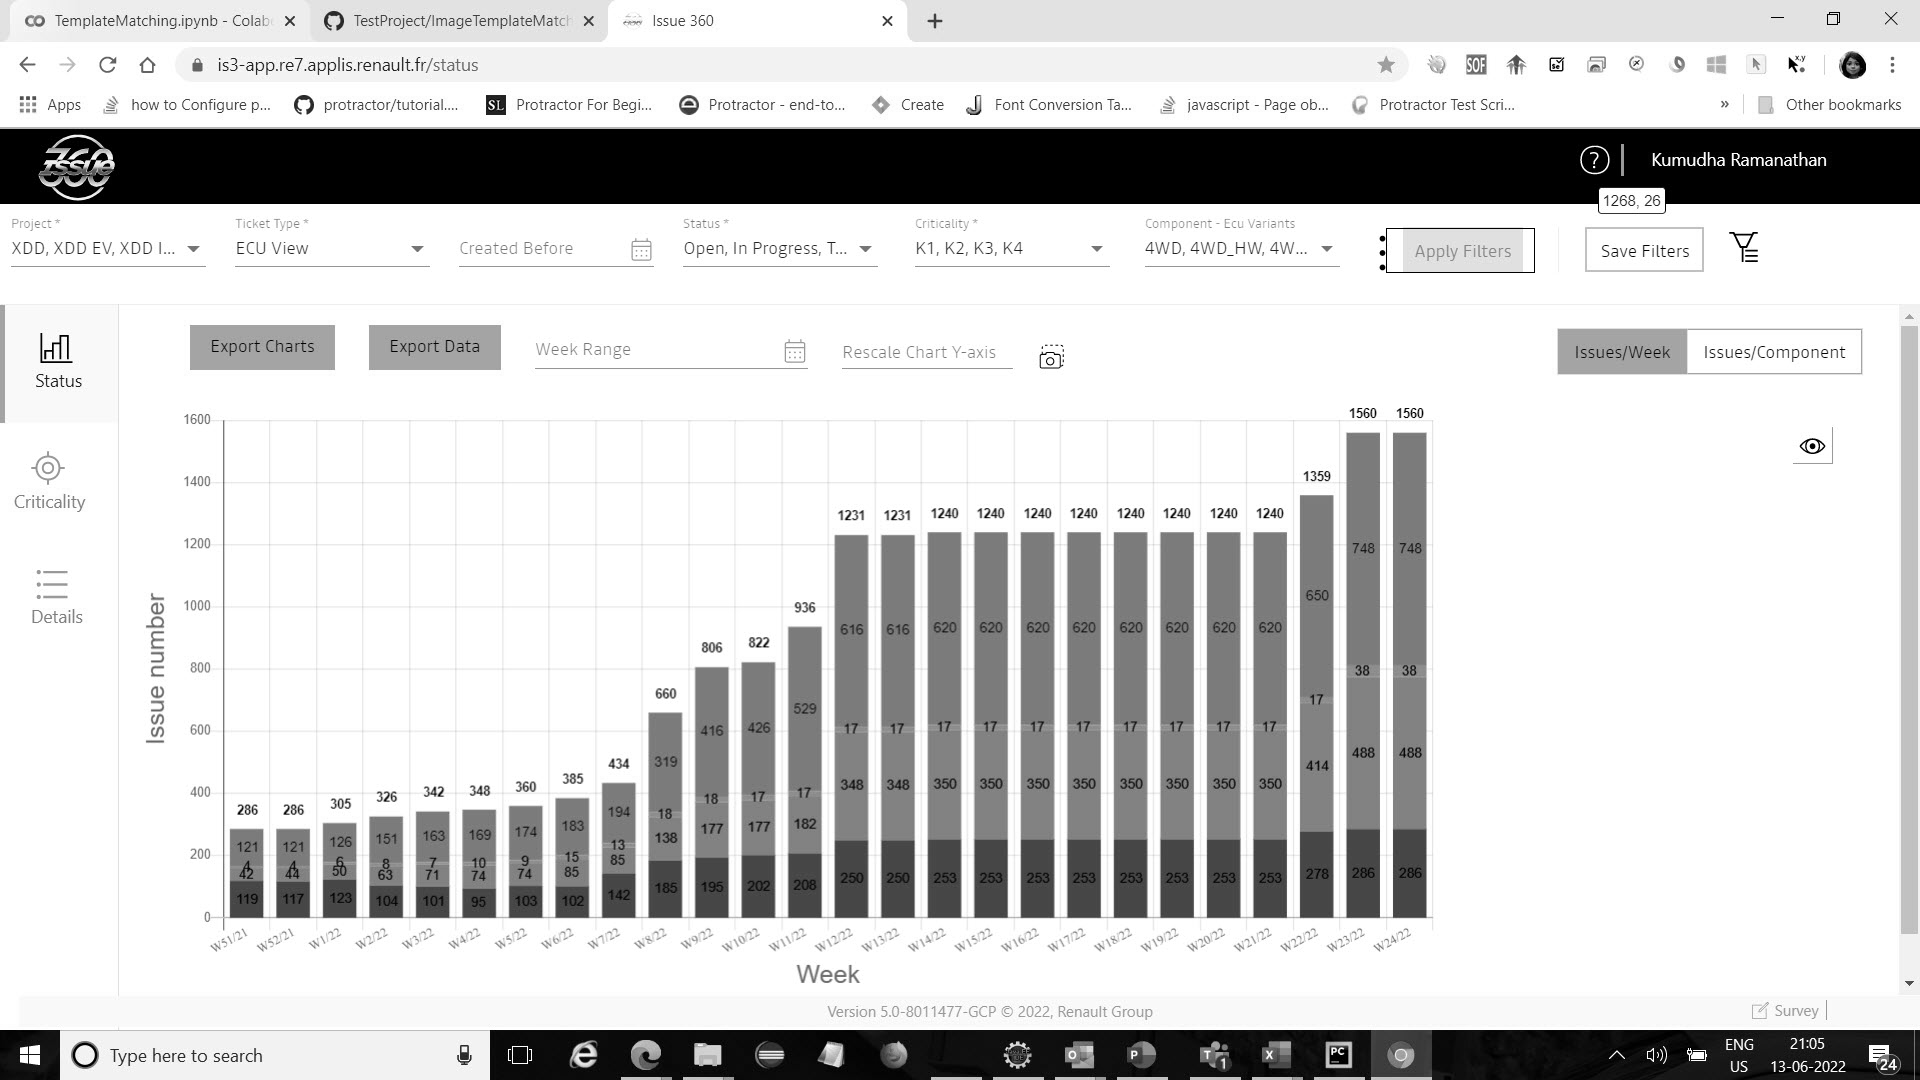

(189, 323) (717, 153)


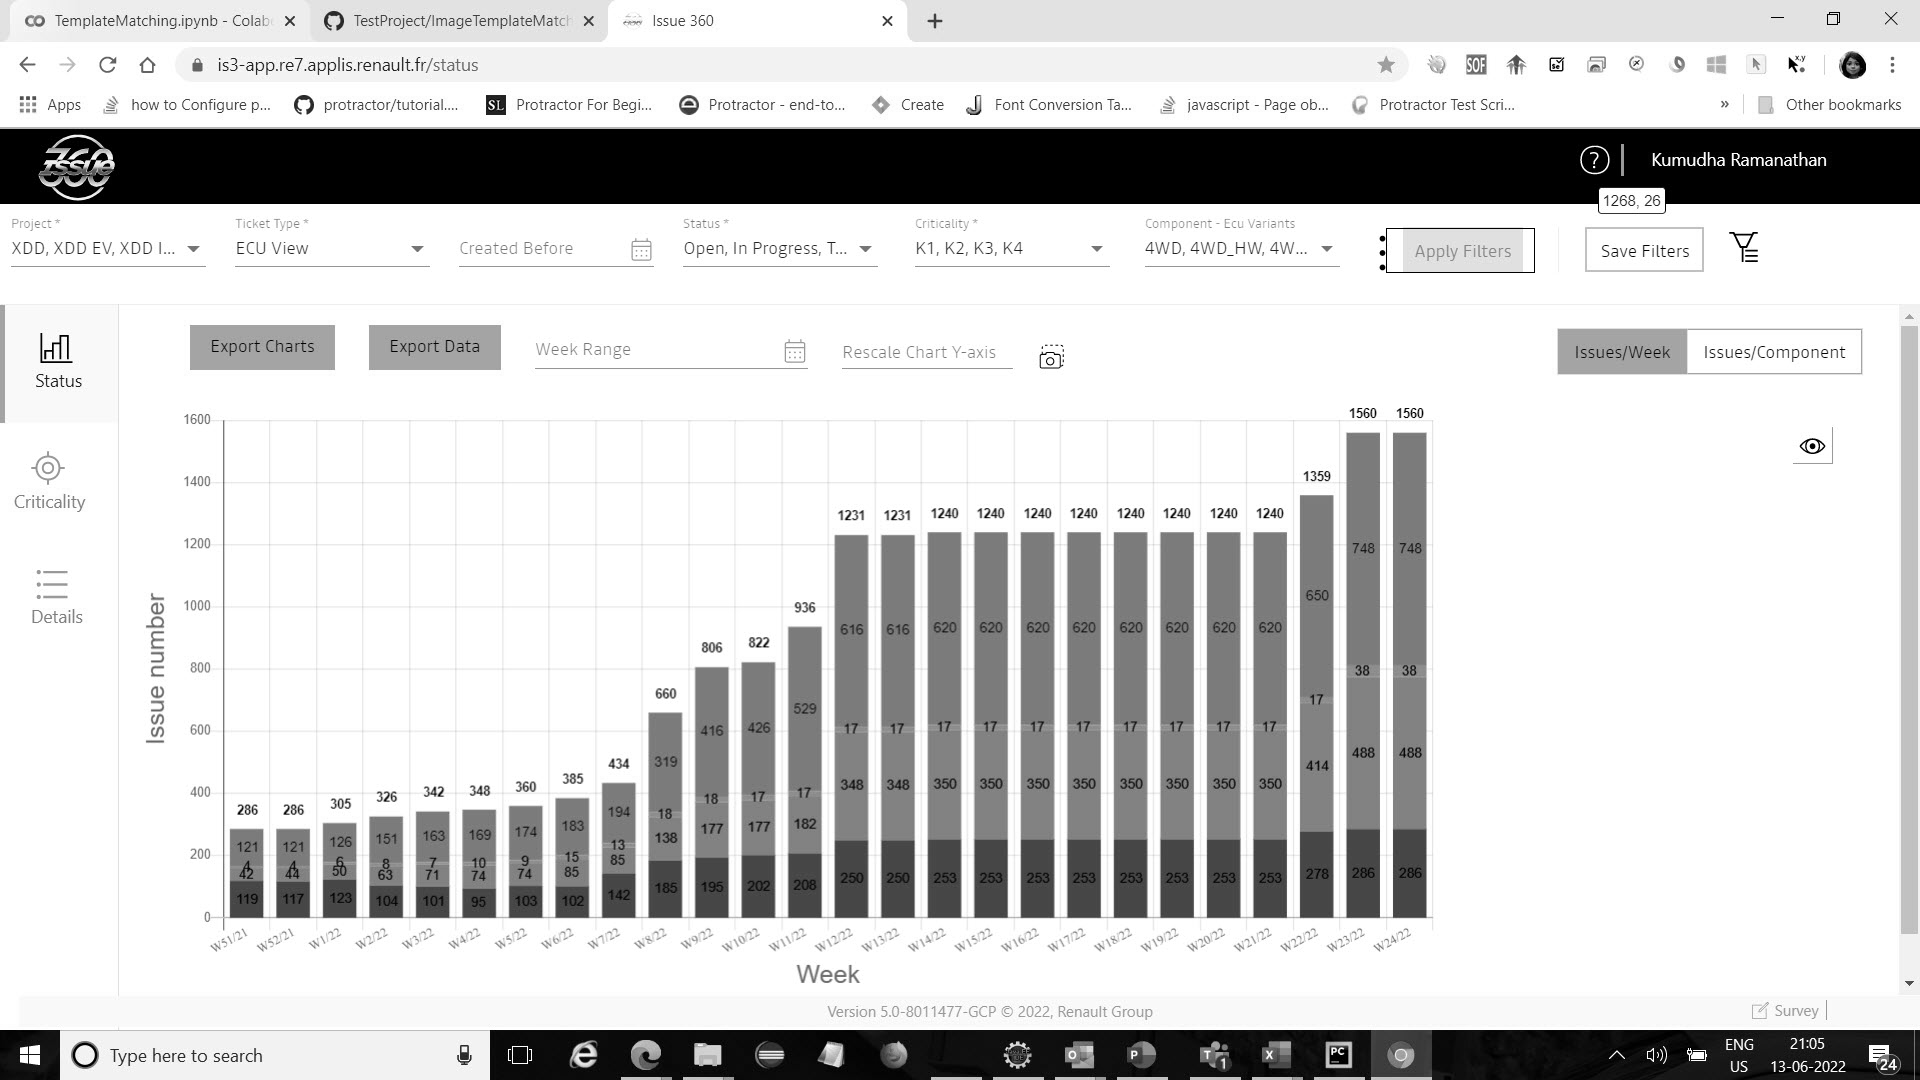

(189, 323) (109, 116)


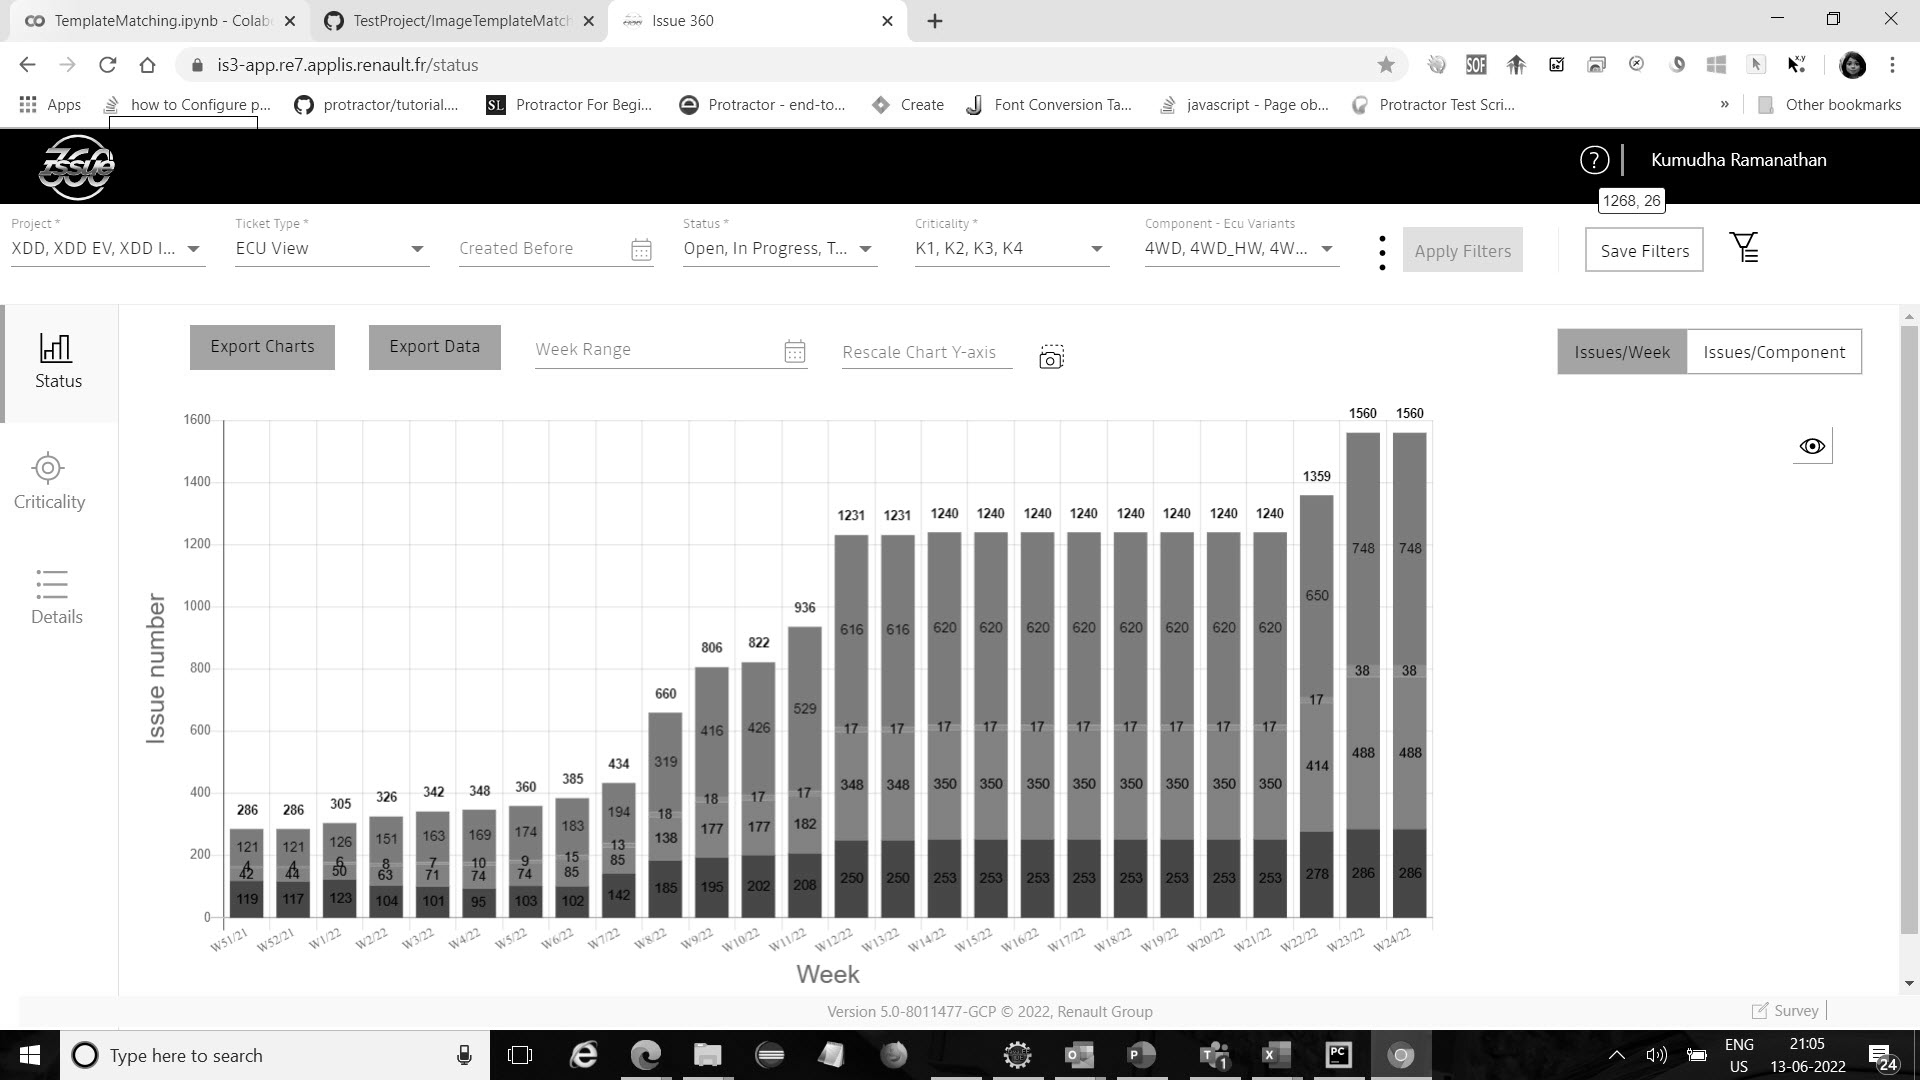

In [ ]:
for method in methods:
   src2 = src.copy()
   result = cv2.matchTemplate(src2, temp, method)
   min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
   print(min_loc, max_loc)
   if method in [cv2.TM_SQDIFF,cv2.TM_CCORR]:
     lacation = min_loc
   else:
     location = max_loc
   bottom_right = (location[0] + W, location[1] + H)
   cv2.rectangle(src2, location,bottom_right, 0, 0)
   cv2_imshow(src2)
   cv2.waitKey(0)
   cv2.destroyAllWindows()

In [ ]:
coords = vis_util.visualize_boxes_and_label_on_image_array(
    src2,
    np.squeeze(boxes),
    np.squeeze(classes),astype(np.int32),
    np.squeeze(scores),
    category_index,
    use_normalized_coordinates=True,
    line_thickness=8,
    min_score_thresh=0.60)
print(coords)

NameError: ignored

In [ ]:
import cv2
import numpy as np

#img = cv2.imread('/content/IS3Source_1.jpg',0)
#img = cv2.imread(src2,0)
ret,thresh = cv2.threshold(img,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)

cnt = contours[0]
M = cv2.moments(cnt)
print(M) 
Cx = int(M['m10']/M['m00'])
Cy = int(M['m01']/M['m00'])
print(Cx)
print(Cy)

SystemError: ignored

In [1]:
# import the necessary packages
import numpy as np
import argparse
import imutils
import glob
import cv2
# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-t", "--template", required=True, help="data/IS3Source_2.jpg")
ap.add_argument("-i", "--images", required=True,
	help="data/IS3_ExportChart.jpg")
ap.add_argument("-v", "--visualize",
	help="Flag indicating whether or not to visualize each iteration")
args = vars(ap.parse_args())
# load the image image, convert it to grayscale, and detect edges
template = cv2.imread(args["template"])
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.Canny(template, 50, 200)
(tH, tW) = template.shape[:2]
cv2.imshow("Template", template)

# loop over the images to find the template in
for imagePath in glob.glob(args["images"] + "/*.jpg"):
	# load the image, convert it to grayscale, and initialize the
	# bookkeeping variable to keep track of the matched region
	image = cv2.imread(imagePath)
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	found = None
	# loop over the scales of the image
	for scale in np.linspace(0.2, 1.0, 20)[::-1]:
		# resize the image according to the scale, and keep track
		# of the ratio of the resizing
		resized = imutils.resize(gray, width = int(gray.shape[1] * scale))
		r = gray.shape[1] / float(resized.shape[1])
		# if the resized image is smaller than the template, then break
		# from the loop
		if resized.shape[0] < tH or resized.shape[1] < tW:
			break

# detect edges in the resized, grayscale image and apply template
		# matching to find the template in the image
		edged = cv2.Canny(resized, 50, 200)
		result = cv2.matchTemplate(edged, template, cv2.TM_CCOEFF)
		(_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)
		# check to see if the iteration should be visualized
		if args.get("visualize", False):
			# draw a bounding box around the detected region
			clone = np.dstack([edged, edged, edged])
			cv2.rectangle(clone, (maxLoc[0], maxLoc[1]),
				(maxLoc[0] + tW, maxLoc[1] + tH), (0, 0, 255), 2)
			cv2.imshow("Visualize", clone)
			cv2.waitKey(0)
		# if we have found a new maximum correlation value, then update
		# the bookkeeping variable
		if found is None or maxVal > found[0]:
			found = (maxVal, maxLoc, r)
	# unpack the bookkeeping variable and compute the (x, y) coordinates
	# of the bounding box based on the resized ratio
	(_, maxLoc, r) = found
	(startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
	(endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))
	# draw a bounding box around the detected result and display the image
	cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
	cv2.imshow("Image", image)
	cv2.waitKey(0)

usage: ipykernel_launcher.py [-h] -t TEMPLATE -i IMAGES [-v VISUALIZE]
ipykernel_launcher.py: error: the following arguments are required: -t/--template, -i/--images


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
